Serialization is the process of converting a data structure or object into a sequence of bits so that it can be stored in a file or memory buffer, or transmitted across a network connection link to be reconstructed later in the same or another computer environment.

Design an algorithm to serialize and deserialize a binary tree. There is no restriction on how your serialization/deserialization algorithm should work. You just need to ensure that a binary tree can be serialized to a string and this string can be deserialized to the original tree structure.

Clarification: The input/output format is the same as how LeetCode serializes a binary tree. You do not necessarily need to follow this format, so please be creative and come up with different approaches yourself.

 

Example 1:

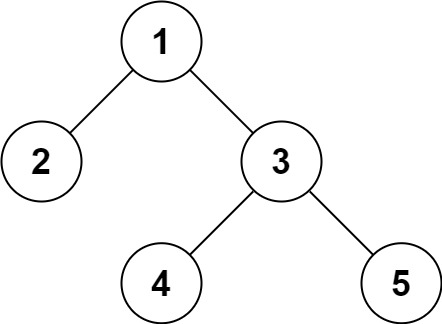

Input: root = [1,2,3,null,null,4,5]
Output: [1,2,3,null,null,4,5]

Example 2:

Input: root = []
Output: []

 

Constraints:

    The number of nodes in the tree is in the range [0, 104].
    -1000 <= Node.val <= 1000



In [ ]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Codec:

    def serialize(self, root):
        """Encodes a tree to a single string.
        
        :type root: TreeNode
        :rtype: str
        """
        self.serialized = []
        def dfs(node):
            if node is None:
                self.serialized.append("None")
            else:
                self.serialized.append(str(node.val))
                dfs(node.left)
                dfs(node.right)
        
        dfs(root)
        return ','.join(self.serialized)

    def deserialize(self, data):
        """Decodes your encoded data to tree.
        
        :type data: str
        :rtype: TreeNode
        """
        if data == 'None':
            return
        
        self.nodes = data.split(',')
        if self.nodes:
            root = TreeNode()
            
            def dfs(node):
                if self.nodes: 
                    if self.nodes[0] != "None":
                        node.val = int(self.nodes[0])
                        self.nodes.pop(0)
                        if self.nodes[0] != "None":
                            node.left = TreeNode()
                            dfs(node.left)
                        else:
                            node.left = None
                            self.nodes.pop(0)
                        if self.nodes[0] != "None":
                            node.right = TreeNode()
                            dfs(node.right)
                        else:
                            node.right = None
                            self.nodes.pop(0)
                    else:
                        node = None
            dfs(root)
            return root
                            
            
        

# Your Codec object will be instantiated and called as such:
# ser = Codec()
# deser = Codec()
# ans = deser.deserialize(ser.serialize(root))